#  Wrangling Data from Twitter API and Other Sources

#### by Banji R. Owabumoye
---

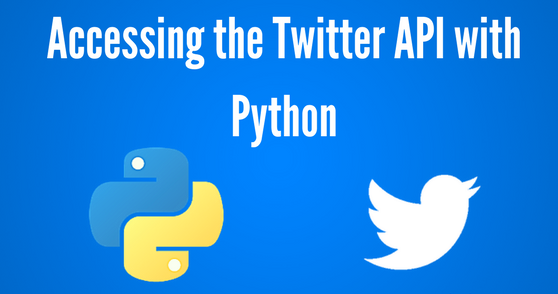

## Table of Contents

- [Introduction](#Introduction)
- [Data Gathering](#Data-Gathering)
    - [Manual download](#Manual-download)
    - [Programatic download](#Programmatic-download)
    - [Twitter API data](#Twitter-API-data)
- [Data Assessment](#Data-Assessment)
    - [Quality issues](#Quality-issues)
    - [Tidiness issues](#Tidiness-issues)
- [Data Cleaning](#Data-Cleaning)
    - [Storing data](#Storing-Data)
- [Analyzing and Visualizing Data](#Analyzing-and-Visualizing-Data)
    - [Visualizations](#Visualizations)
- [Resources](#Resources:)


## Introduction
<a id='## Introduction'></a>

---
Data wrangling is based on three major activities which are data gathering, data assessing, and data cleaning.
This project is based on wrangling dataset from tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people’s dogs with funny comment about the dog. This project adopted manual and programmatic methods to gather, assess and clean datasets.

Before I discuss how datasets used for this project were acquired, I will import all the packages and libraries needed for this project.

   **Importation of Packages**

In [8]:
# importation of packages and libraries

import pandas as pd
import os
import requests
import time
import numpy as np
import tweepy
import calendar
import json
import seaborn as sns
import math
import matplotlib.pyplot as plt

%matplotlib inline

## Data Gathering
<a id='## Data-Gathering'></a>

---
Datasets were gathered manually and programmatically (using python programming language codes) from three different sources. A twitter-archive-enhanced dataset stored as comma separated value (csv) file was manually downloaded from Udacity platform. The second dataset gathered is a tab separated value (tsv) file, labelled ‘image_predictions.tsv’.  This dataset was programmatically downloaded from a Uniform Resource Locator (URL) through a library known as requests. The third dataset was gathered from Twitter API using Tweepy package to query the Javascript Object Notation (JSON) file labelled ‘tweet_json.txt’. To access this dataset, a developer account was requested for and granted by Twitter which made it possible to generate API Key, API Key Secret, Access Token, and Access Token Secret used as authenticator to access the data from archive. Twitter-archive-enhanced.csv, image_predictions.tsv, and tweet_json.txt datasets were loaded into Udacity workspace for assessment and cleaning.

#### Manual download 
<a id='#### Manual-download '></a>
A comma separated values (csv) was manually download from this [link.](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv) Manual download is done when a link is clicked and the file downloaded directly.

In [9]:
# loading of dataset downloaded manually.

tweeter_df = pd.read_csv('twitter-archive-enhanced.csv')

#### Programmatic download
<a id='#### Programmatic-download'></a>
This was achieved by using the Requests library to download the tab separated values (tsv) file that contains tweet image prediction.

In [10]:
# creating new folder to save data downloaded from requests library
folder_name = 'banji'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [11]:
# The website address to programmatically download data from
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# To download tsv file programmatically using request library
response = requests.get(url)


In [12]:
# To access the content and write to file

with open(os.path.join(folder_name, url.split('/')[-1]), mode ='wb') as file:
    file.write(response.content)

In [13]:
# To load downloaded tab separated value (tsv) file using pandas
image_df = pd.read_csv('image-predictions.tsv', sep='\t')

#### Twitter API data
<a id='#### Twitter-API-data'></a>
Data needed from twitter was ingested through twitter's Application Programming Interface (API) known as Tweepy. The ingested data is in JavaScript Object Notation (JSON) format. Accessing twitter API was possible after been admitted as Twitter developer.

After gathering all the dataset needed for this project, we will move to the second stage which is data assessment.

In [14]:
# developer's confidential digital keys to access Twitter API through Tweepy
api_key = 'CONFIDENTIAL' # api_key should not be made public

api_key_secret = 'CONFIDENTIAL' # api_key_secret should not be made public

access_token = 'CONFIDENTIAL' # access_token should not be made public

access_token_secret = 'CONFIDENTIAL' # access_token_secret should not be made public

In [15]:
# API accessbility authentication

auth = tweepy.OAuthHandler(api_key, api_key_secret)

auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [16]:
# The unique tweet_id in tweeter_df dataframe
unique_twt_ids = [tweeter_df['tweet_id'].unique()]

#save the gathered data to a file
with open("tweet_json.txt", "w") as file:
    for tweet_id in unique_twt_ids:
        print(f"Gather id: {tweet_id}")
        try:
            #get all the twitter status - extended mode gives us additional data
            tweet = api.get_status(tweet_id, tweet_mode = "extended")
            #dump the json data to our file
            json.dump(tweet._json, file)
            #add a linebreak after each dump
            file.write('\n')
        except Exception as e:
            print(f"Error - id: {tweet_id}" + str(e))

Gather id: [892420643555336193 892177421306343426 891815181378084864 ...
 666033412701032449 666029285002620928 666020888022790149]
Error - id: [892420643555336193 892177421306343426 891815181378084864 ...
 666033412701032449 666029285002620928 666020888022790149]401 Unauthorized
89 - Invalid or expired token.


In [17]:
# saving gathered data to dataframe

tweeter_api_data = []

# To read the created file
with open('tweet_json.txt', 'r') as file:
    for data in file:
        try:
            tweet = json.loads(data)
            
            # append a dictionary to the created list
            tweeter_api_data.append({
                'tweet_id' : tweet['id'], 'retweet_count':tweet['retweet_count'],
                'favorite_count' : tweet['favorite_count']
            })
            
        except:
            print('error')
            
tweeter_api_df = pd.DataFrame(tweeter_api_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweeter_api_df

,tweet_id,retweet_count,favorite_count


In [18]:
tweeter_api_df = pd.read_csv('tweeter_api_df.csv')

## Data Assessment
<a id='## Data-Assessment'></a>

---
Just like data gathering, the three datasets were assessed visually or manually and assessed programmatically.  The datasets were visually assessed by looking at the dataframe of each dataset for quality and structural issues. Also, functions and methods were adopted to assess the datasets programmatically.  This assessment methods revealed quality and structural issues.

After the assessment, observed quality and structural issues were listed for cleaning.

In [19]:
# to visualize the top rows of the dataframe
tweeter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [20]:
# to visualize the last few rows of the dataframe
tweeter_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [21]:
# getting more details of the dataframe programmatically
tweeter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
# having descriptive view of the dataframe
tweeter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
# to visualize the top rows of the dataframe
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
# to visualize the last few rows of the dataframe
image_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [25]:
# getting more details of the dataframe programmatically
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
# having descriptive view of the dataframe
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
# to visualize the top rows of the dataframe
tweeter_api_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [28]:
# to visualize the last few rows of the dataframe
tweeter_api_df.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [29]:
# getting more details of the dataframe programmatically
tweeter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [30]:
# having descriptive view of the dataframe
tweeter_api_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### Quality issues

<a id='#### Quality-issues'></a>
1. Doggo, floofer, pupper, and puppo columns have values as      'None'

2. Platform sources embedded in html code in source column 

3. Timestamp datatype is object instead of datetime

4. Over 2000 null values in eachcolumn(in_reply_to_status_id,    in_reply_to_user_id, retweeted_status_id,                    retweeted_status_user_id, retweeted_status_timestamp)

5. Tweet_id datatype is int64 instead of object

6. Inconsistency in p1 column case, some are upper while some    are lower and underscore in between words

7. Incosistency in p2 column case, some are uppr while some      are lower and underscore in between words

8. Incosistency in p3 column case, some are uppr while some      are lower and underscore in between words

9. Tweet_id datatype is int64 rather than object

10. Column names except tweet_id are not descriptive

#### Tidiness issues
<a id ='#### Tidiness-issues'></a>

1. Doggo, floofer, pupper, and puppo should not have separate    columns

2. Day_name, month, and year_month columns from timestamp        column

3. Tweeter_df, image_df, and tweeter_api_df dataframes should    merged together since they all have tweet_id column

4. doggo, pupper, floofer, and puppo columns are no more        needed

## Data Cleaning
<a id = '## Data-Cleaning'></a>

---
As expected, copies of dataframes to be cleaned were created. Quality issues and structural issues were cleaned programmatically by defining issues, writing code to clean the issues, and testing the outcome to ascertain the cleanness. Quality and structural changes made are:

-	none values in doggo, floofer, pupper, and puppo columns were changed to Nan
-	platforms used for tweeting were extracted from html code
-	timestamp column made datetime datatype
-	in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,, and  retweeted_status_timestamp columns were dropped
-	tweet_id columns in all the dataframes changed to object datatype
-	p1, p2, and p3 columns’ values were changed to lowercase and underscore replaced with space
-	column labels were made descriptive
-	doggo, pupper, floofer, and puppo values merged into newly created dog stage column
-	day_name, month, and year_month columns were added
-	tweeter_df, image_df, and tweeter_api_df dataframes were merged into one dataframe and named twitter_archive_master
-	doggo, pupper, floofer, and puppo columns were dropped.

Once the datasets are clean, the next task will be to store them as a single csv or flat file.

In [31]:
# Make copies of original pieces of data

twt_clean_df = tweeter_df.copy()
image_clean_df = image_df.copy()
api_clean_df = tweeter_api_df.copy()

#### Quality Issues

>#### Issue #1: doggo, floofer, pupper, and puppo columns have values as 'None'

>#### Define: doggo, floofer, pupper, and puppo columns nan values represented as 'None' will be changed to nan with replace function.

#### Code

In [32]:
# to replace 'None' to nan in doggo column
twt_clean_df.doggo.replace('None', np.nan, inplace=True)

In [33]:
# to replace 'None' to nan in floofer column
twt_clean_df.floofer.replace('None', np.nan, inplace=True)

In [34]:
# to replace 'None' to nan in pupper column
twt_clean_df.pupper.replace('None', np.nan, inplace=True)

In [35]:
# to replace 'None' to nan in puppo column
twt_clean_df.puppo.replace('None', np.nan, inplace=True)

#### Test

In [36]:
# to view the first rows of the dataframe to consider the changes
twt_clean_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


>#### Issue #2: platform sources embedded in html code in source column

>#### Define: iphone, twitter, vine, and tweet deck are sources of tweet embedded in url and html code. These sources will be extracted with replace function

#### Code

In [37]:
# To know the distinct values of source column
twt_clean_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [38]:
# To extract iphone platform from source column
twt_clean_df.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','iphone', inplace = True)

In [39]:
# To extract vine platform from source column
twt_clean_df.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','vine', inplace = True)

In [40]:
# To extract twitter from source column
twt_clean_df.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'twitter', inplace = True)

In [41]:
# To extract tweetdeck from source column
twt_clean_df.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'tweetdeck', inplace = True)

#### Test

In [42]:
twt_clean_df.source.value_counts()

iphone       2221
vine           91
twitter        33
tweetdeck      11
Name: source, dtype: int64

>#### Issue #3: timestamp datatype is object instead of datetime

>#### Define: timestamp datatype will be converted to datetime datatype in order to perform analysis with it

#### Code

In [86]:
# Removing new lines from  timestamp column
twt_clean_df.timestamp = pd.to_datetime(twt_clean_df.timestamp)

#### Test

In [87]:
# checking the datatype of timestamp
twt_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               97 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              257 non-null    object             
 11  puppo               30 non-null     object             
 12  dog_stage           380 non-null  

>#### Issue #4: over 2000 null values in each column(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

>#### Define : Columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp with very few values will be droped from the dataframe

#### Code

In [45]:
# Removing columns that are not needed
twt_clean_df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [46]:
# checking the columns of the dataframe
twt_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               97 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              257 non-null    object             
 11  puppo               30 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3

>#### Issue #5: tweet_id datatype is int64 instead of object

>#### Define: tweet_id datatype will be changed from int64 to object

#### Code

In [47]:
# changing tweet_id datatype from int64 to object
twt_clean_df['tweet_id']= twt_clean_df['tweet_id'].astype(str)

#### Test

In [48]:
# to confirm datatype change
twt_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               97 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              257 non-null    object             
 11  puppo               30 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2

>#### Issue #6: inconsistency in p1 column case, some are upper while some are lower and underscore in between words

>#### Define: Words in p1 column will be changed to lower case and hyphen between words will be replaced with space in order to maintain consistency

#### Code

In [49]:
# changing values in p1 column to lower case and replacing '-' with ''
image_clean_df['p1'] = image_clean_df.p1.str.replace('_',' ').str.lower()

#### Test

In [50]:
# confirming the changes
image_clean_df.p1.sample(3)

281            goose
1781    hippopotamus
1237     boston bull
Name: p1, dtype: object

>#### Issue #7: incosistency in p2 column case, some are uppr while some are lower and underscore in between words

>#### Define: Words in p2 column will be changed to lower case and hyphen between words will be replaced with space in order to maintain consistency

#### Code

In [51]:
# changing values in p1 column to lower case and replacing '-' with ''
image_clean_df['p2'] = image_clean_df.p2.str.replace('_',' ').str.lower()

#### Test

In [52]:
# confirming the changes
image_clean_df.p2.sample(3)

166         coral reef
1472    cocker spaniel
1718        toy poodle
Name: p2, dtype: object

>#### Issue #8: incosistency in p3 column case, some are uppr while some are lower and underscore in between words

>#### Define:  Words in p3 column will be changed to lower case and hyphen between words will be replaced with space in order to maintain consistency

#### Code

In [53]:
# changing values in p1 column to lower case and replacing '-' with ''
image_clean_df['p3'] = image_clean_df.p3.str.replace('_',' ').str.lower()

#### Test

In [54]:
# confirming the changes
image_clean_df.p3.sample(3)

787           ice bear
1618    cocker spaniel
1336       siamese cat
Name: p3, dtype: object

>#### Issue #9: tweet_id datatype is int64 rather than object

>#### Define: tweet_id datatype will be changed int64 to object

#### Code

In [55]:
# changing tweet_id datatype from int64 to object
image_clean_df['tweet_id'] = image_clean_df['tweet_id'].astype(str)

#### Test

In [56]:
# to confirm datatype change
image_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


>#### Issue #10: column names except tweet_id are not descriptive

>#### Deine: all the column names of image_df dataframe will be descriptively renamed except tweet_id

#### Code

In [57]:
# renaming of image_df columns
image_clean_df.rename(columns={'jpg_url':'image_url', 'img_num':'image_number', 'img_num':'image_number', 'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)


#### Test

In [58]:
# to confirm the columns rename
image_clean_df.columns

Index(['tweet_id', 'image_url', 'image_number', 'first_prediction',
       'first_confidence', 'first_dog', 'second_prediction',
       'second_confidence', 'second_dog', 'third_prediction',
       'third_confidence', 'third_dog'],
      dtype='object')

>#### Structural Issues

>#### Issue 1: doggo, floofer, pupper, and puppo should not have separate columns

>#### Define: columns such as doggo, floofer, pupper, and puppo in twt_clean_df will be combined into one column named dog_stage

#### Code

In [59]:
# combining doggo, floofer, pupper, and puppo into dog_stage column
twt_clean_df['dog_stage'] = twt_clean_df['doggo'
                                        ].map(str) + twt_clean_df['floofer'
                                                                 ].map(str) + twt_clean_df['pupper'
                                                                                          ].map(str) + twt_clean_df['puppo'].map(str)


In [60]:
# To know distinct values in dog_stage column 
twt_clean_df.dog_stage.value_counts()

nannannannan          1976
nannanpuppernan        245
doggonannannan          83
nannannanpuppo          29
doggonanpuppernan       12
nanfloofernannan         9
doggonannanpuppo         1
doggofloofernannan       1
Name: dog_stage, dtype: int64

In [61]:
# function to separate combined values of pupper, doggo, floofer, and puppo columns in dog_stage column
def dog_stage(old_value, new_value):
    """ Combined values of pupper, doggo, floofer, and puppo columns in 
    dog_stage column were distinctly separated    
    """
    twt_clean_df.dog_stage.replace(old_value, new_value, inplace = True)

In [62]:
# replacing dog stage column value
dog_stage('nannannannan', np.nan)

In [63]:
# replacing dog stage column value
dog_stage('nannanpuppernan', 'pupper')

In [64]:
# replacing dog stage column value
dog_stage('doggonannannan', 'doggo')

In [65]:
# replacing dog stage column value
dog_stage('nannannanpuppo', 'puppo')

In [66]:
# replacing dog stage column value
dog_stage('doggonanpuppernan', 'doggo')

In [67]:
# replacing dog stage column value
dog_stage('nanfloofernannan', 'floofer')

In [68]:
# replacing dog stage column value
dog_stage('doggonannanpuppo', 'doggo')

In [69]:
# replacing dog stage column value
dog_stage('doggofloofernannan', 'doggo')

#### Test

In [70]:
# confirming the distinct values of dog_stage column
twt_clean_df.dog_stage.value_counts()

pupper     245
doggo       97
puppo       29
floofer      9
Name: dog_stage, dtype: int64

>#### Issue #2: day_name, month, and year columns from timestamp column

>#### Define: Three columns (day_name, month, and year_month) will be extracted from timestamp column

#### Code

In [88]:
# extracting names of the week from timestamp
twt_clean_df['day_name'] = twt_clean_df['timestamp'].dt.day_name()

In [89]:
# extracting names of month in calendar year from timestamp
twt_clean_df['month'] = pd.to_datetime(twt_clean_df['timestamp']).dt.strftime('%B')

In [90]:
# extracting year_month from timestamp
twt_clean_df['year_month'] = pd.to_datetime(twt_clean_df["timestamp"]).dt.to_period('M')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


#### Test

In [74]:
twt_clean_df.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,day_name,month,year_month
1287,708356463048204288,2016-03-11 18:18:36+00:00,iphone,This is Oliver. That is his castle. He protect...,https://twitter.com/dog_rates/status/708356463...,10,10,Oliver,NaN,NaN,NaN,NaN,NaN,Friday,March,2016-03
389,826476773533745153,2017-01-31 17:06:32+00:00,iphone,This is Pilot. He has mastered the synchronize...,https://twitter.com/dog_rates/status/826476773...,12,10,Pilot,doggo,NaN,NaN,NaN,doggo,Tuesday,January,2017-01


>#### Issue #3: twt_clean_df, image_clean_df, and api_clean_df dataframes should merged together since they all have tweet_id column

>#### Define: twt_clean_df, image_clean_df, and api_clean_df will be merged and be named as twitter_archive_master

#### Code

In [75]:
# changing tweet_id datatype from int64 to object
api_clean_df['tweet_id']= api_clean_df['tweet_id'].astype(str)

In [92]:
# merging of dataframes
twitter_archive_master = pd.merge(pd.merge(twt_clean_df, image_clean_df, on ='tweet_id', how='left'), api_clean_df, on='tweet_id', how='left')

twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

#### Test

In [93]:
# To see the new dataframe (twitter_archive_master)
twitter_archive_master.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,image_url,...,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count
756,778650543019483137,2016-09-21 17:42:10+00:00,iphone,Meet Strider. He thinks he's a sorority girl. ...,https://twitter.com/dog_rates/status/778650543...,10,10,Strider,NaN,https://pbs.twimg.com/media/Cs5ShihWEAAH2ti.jpg,...,0.515699,True,malinois,0.300292,True,kelpie,0.087022,True,1729.0,6430.0
1078,739485634323156992,2016-06-05 15:54:48+00:00,iphone,This is Kyle. He's a heavy drinker and an avid...,https://twitter.com/dog_rates/status/739485634...,6,10,Kyle,NaN,https://pbs.twimg.com/media/CkMuP7SWkAAD-2R.jpg,...,0.640256,True,english foxhound,0.229799,True,beagle,0.037754,True,3309.0,7887.0


>#### Issue #4: doggo, pupper, floofer, and puppo columns are no more needed

>#### Define: columns like doggo, pupper, floofer, and puppo will be dropped from twitter_archive_columns because the three columns are now combined in dog_stage column 

#### Code

In [ ]:
# to remove doggo, pupper, floofer, and puppo columns
twitter_archive_master.drop(['doggo','pupper','floofer','puppo'], axis =1, inplace=True)

#### Test

In [91]:
# list of columns in twitter_archive_master
for i in twitter_archive_master.columns:
    display(i)

'tweet_id'

'timestamp'

'source'

'text'

'expanded_urls'

'rating_numerator'

'rating_denominator'

'name'

'dog_stage'

'image_url'

'image_number'

'first_prediction'

'first_confidence'

'first_dog'

'second_prediction'

'second_confidence'

'second_dog'

'third_prediction'

'third_confidence'

'third_dog'

'retweet_count'

'favorite_count'

In [96]:
# more details of the master dataframe
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   dog_stage           380 non-null    object             
 9   image_url           2075 non-null   object             
 10  image_number        2075 non-null   float64            
 11  first_prediction    2075 non-null   object             
 12  first_confidence    2075 non-null 

#### Storing data
<a id = '####Storing-Data'></a>

Since our datasets have been gathered, assessed, and cleaned. Let us now merge the datasets and save them a master dataset to a csv file named "twitter_archive_master.csv".

After storing the datasets successfully, we will look for some insights in order to come up with some visualizations

In [82]:
# storing of master dataframe 
twitter_archive_master = twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
<a id = '## Analyzing-and-Visualizing-Data'><a/>

---
Thank you for following to this extent. Next task is to analyse and visualize the list insights.

>#### Insights:
>1. Is there any relationship between retweet count and          favorite count, if so, what type?   

>2. What is tweet frequency on each day of the week?

>3. How many tweets recorded for each month of all the years?

>4. What is the number of tweets recorded for each dog stage      on week days?

>5. What is the percentage of tweets received by each dog      stage?

>6. What are the tweets platforms used and their tweets percentage?

In [83]:
# loading twitter_archive_ master dataframe
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

### Visualizations
<a id = '### Visualizations'></a>

- #### Is there any relationships between retweet count and favorite count, if so, what type?

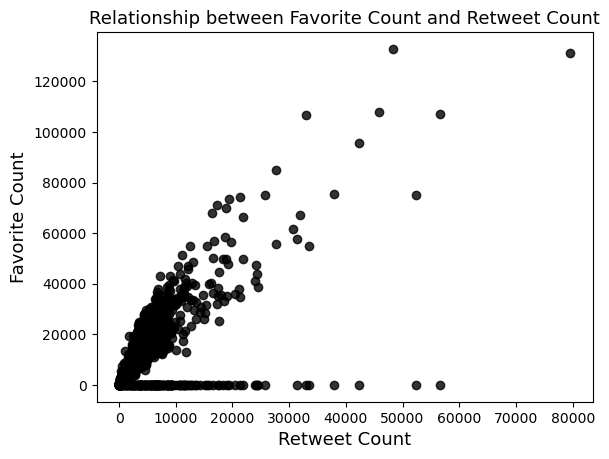

In [84]:
# scatter plot for favorite count and retweet count relationship
#sns.set_theme(color_codes = True)
sns.regplot(x="retweet_count", y="favorite_count", fit_reg=False,
            data = twitter_archive_master, color ='black')
plt.xlabel('Retweet Count', size = 13)
plt.ylabel('Favorite Count', size = 13)
plt.title('Relationship between Favorite Count and Retweet Count', size = 13);

**Observations**  
The scatter plot analysis revealed that as favourite tweets increased so also tweets that were retweeted. This shows there is positive relationship between tweets retweeted and tweets that are favourites. This means that tweets that are liked have possibility of been reposted multiple times by many fans.

Let's now examine the number of tweets in each day.

- #### What is twwet frequency on each day of the week?

In [97]:
# to know number of tweets daily
weekdays_tweet= twitter_archive_master.day_name.value_counts()

# converting to dataframe and renaming columns
weekdays_tweet = weekdays_tweet.to_frame().reset_index(
).rename(columns={'index':'Day','day_name':'Count'})

weekdays_tweet

,Day,Count
0,Monday,384
1,Tuesday,356
2,Wednesday,354
3,Friday,333
4,Thursday,326
5,Saturday,309
6,Sunday,294


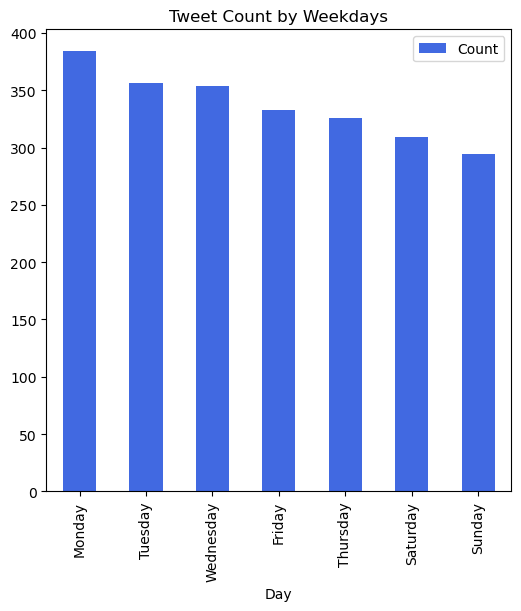

In [98]:
# chart for daily tweet
weekdays_tweet.plot(kind = 'bar', x = 'Day', 
                     color = 'royalblue',
                   figsize = (6,6), title ='Tweet Count by Weekdays',
                   fontsize = 10);

**Observations**
The tweet frequency was quite steady with slight decline from Monday through Sunday. Highest number of tweets which is 384, was recorded on Monday while, lowest number of tweets 294 was recorded on Sunday. This means that WeRateDogs fans are more active between Monday through the midweek and some of them would be off the page during weekend.

Let's now check frequency of tweets in relation to months.

- #### How many tweets recorded for each month of all the years observed?

In [99]:
# to know number of tweets yearly by month
year_month_tweet = twitter_archive_master.year_month.value_counts()

# converting to dataframe and renaming of columns
year_month_tweet = year_month_tweet.to_frame().reset_index(
).rename(columns={'index':'Year_Month','year_month':'Count'}
        ).sort_values('Year_Month')

year_month_tweet 

,Year_Month,Count
1,2015-11,302
0,2015-12,388
2,2016-01,194
4,2016-02,125
3,2016-03,137
16,2016-04,60
15,2016-05,60
6,2016-06,97
5,2016-07,105
12,2016-08,75


In [100]:
def bar_chart(data, x, color, title, figsize, fontsize):
    """
    This function with six arguments will plot a simple 
    bar chart.
    """
    data.plot(kind = 'bar', x = x, title = title, color = color, figsize = figsize, fontsize = fontsize)
    

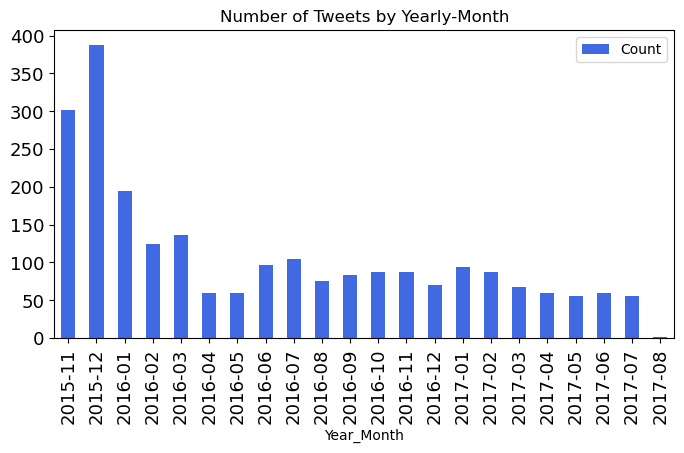

In [102]:
# chart for tweets of all the months
bar_chart(year_month_tweet , 'Year_Month', 'royalblue', 'Number of Tweets by Yearly-Month', (8,4), 13)

**Observations**

The data timeline was November 2015 to August 2017, which is 21 months. Within this period, the first five months (November 2015 – March 2016) recorded highest number of tweets with highest been in the month of December 2015. However, number of tweets dropped sharply from April 2016 and maintained the low trend till July 2017 which is 15 months period until the lowest number of tweets were recorded in August 2017. This deep inspection calls for further analysis to confirm the main reasons WeRateDogs popularity dropped sharply after five months.

Next, we will look at number of tweets received by each dog stage on week days.

- #### What is the number of tweets recorded for each dog stage on week days?

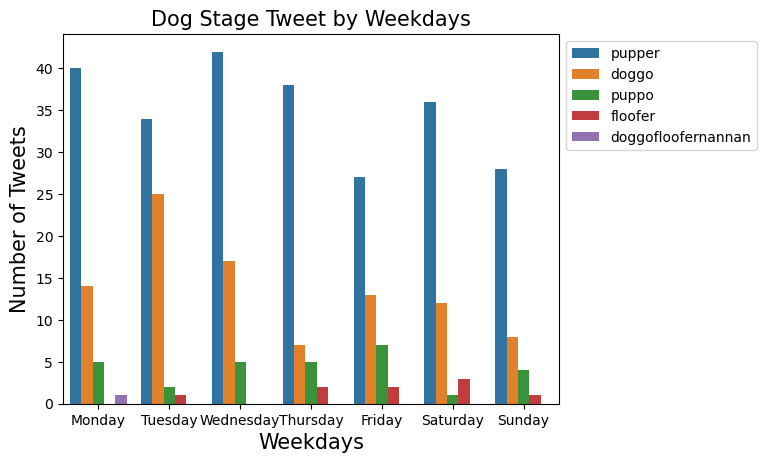

In [103]:
# number of daily tweets for each dog 
dog_daily_tweet = twitter_archive_master.groupby('day_name')['dog_stage'].value_counts()

dog_daily_tweet = dog_daily_tweet.to_frame().rename(columns={'dog_stage': 'Count'}).reset_index()

# dog stage chart for tweets of each weekday 
ax = sns.barplot(x = 'day_name', 
            y = 'Count', hue = 'dog_stage', 
            data = dog_daily_tweet, 
            order = ['Monday', 'Tuesday', 'Wednesday', 
                     'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_xlabel('Weekdays', size = 15)
ax.set_ylabel('Number of Tweets', size = 15)
ax.set_title('Dog Stage Tweet by Weekdays', size = 15)
plt.legend(loc = 2, bbox_to_anchor = (1, 1));

**Observations**

Among the four dog stages (pupper, doggo, puppo, and floofer) pupper recorded the highest from Monday through Sunday. Doggo is in distant second position followed by puppo and floofer having just a fraction. Pupper recorded highest number of tweets on Wednesday, doggo best day was Tuesday. Meanwhile, puppo’s lucky day was Friday and floofer’s day was Saturday.

It will be more insightful to look at percentage of tweets received by each dog stage.

- #### What is the percentage of tweets received by each dog stage?

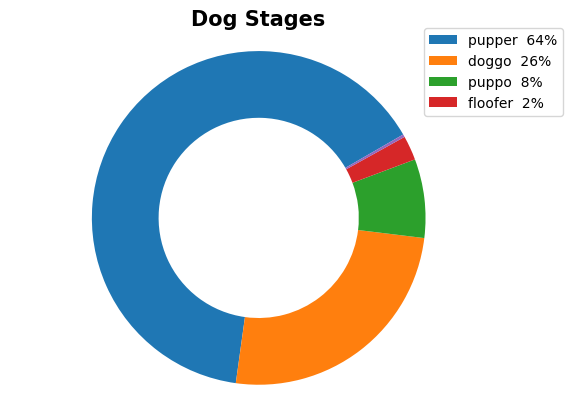

In [104]:
# number of tweet for dog stages
dog_stage = twitter_archive_master.dog_stage.value_counts()


plt.pie(dog_stage, startangle = 30, labeldistance = 1.2, 
        counterclock = True, wedgeprops = {'width':0.4, 'linewidth': 1})
plt.title('Dog Stages', fontweight = 'bold', fontsize = 15)

plt.legend(['pupper  64%', 'doggo  26%', 'puppo  8%', 'floofer  2%'], 
           bbox_to_anchor = (1,0.8), bbox_transform=plt.gcf().transFigure, loc = 'center right')
plt.gca().axis('equal');

**Observations**

Among the four dog stages, the most popular which is also the youngest stage is pupper with 64% tweet followed by doggo which is older, gathering 26% of the tweets. Puppo has 8% while floofer which is the oldest dog stage has 2%. This insight reveals human tendency to show more interest in young dogs because of their cuteness compared to older dogs.

It will be unjust if we fail to look at platforms used by fans for tweeting. This insight will be the last for this project.

- #### What are the tweet platforms used?

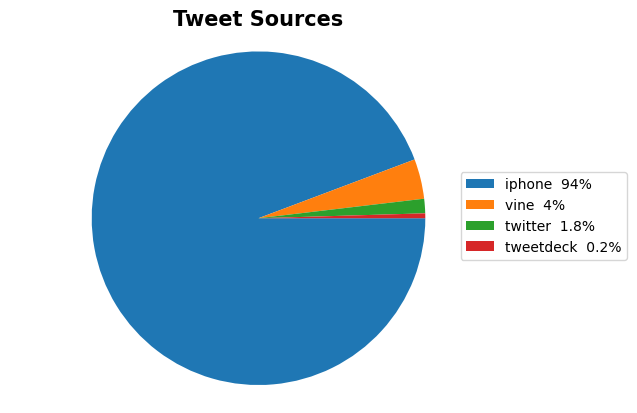

In [105]:
# number of tweet sources
tweet_source = twitter_archive_master.source.value_counts()

# chart showing platforms used for tweeting
plt.pie(tweet_source, counterclock = False)
plt.title('Tweet Sources', fontweight = 'bold', fontsize = 15)
plt.legend(['iphone  94%', 'vine  4%', 'twitter  1.8%', 'tweetdeck  0.2%'], 
           bbox_to_anchor = (1.1,0.5), bbox_transform=plt.gcf().transFigure, loc = 'center right')
plt.gca().axis('equal');

**Observations**

The tweet platforms used were iphone, vine, twitter, and tweetdeck. Iphone recorded 94%, while vine recorded 4%. Twitter platform recorded 1.8% while tweetdeck settled for 0.2%. This analysis has shown that core fans of WeRateDogs are iphone users.

## Resources:
<a id = '##Resources:'></a>

---

https://pythonguides.com/matplotlib-pie-chart/

https://stackoverflow.com/questions/72426371/extract-month-name-from-date-column-pandas

https://datascientyst.com/extract-month-and-year-datetime-column-in-pandas/

https://www.geeksforgeeks.org/change-the-legend-position-in-matplotlib/

https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart